# 2. Ridge, Lasso, Elastic Net


규제: 
  * 선형 회귀(linear regression)의 과적합(over fitting) 문제를 해결하기 위해 회귀 계수(weight)에 패널티를 주는 것이다.

   (회귀계수가 과도하게 높게 설정이 되면 과적합이 일어나게 된다).
  * 적용한 규제에 따라 선형 회귀 모델을 여러 유형으로 나눌 수 있다: `Ridge, Lasso, Elastic Net`
  * 앞서 1. Linear Regression에서 사용한 LinearRegression은 규제가 적용되지 않은 일반 선형 회귀이다.

규제 방법:
  * `L1`: weight 절댓값 대해 패널티를 부여하는 규제방식 --> weight를 0으로 만들어 예측에서 영향력이 크지 않은 특정 피쳐를 제외시킨다.
  * `L2`: weight^2에 대해 패널티를 부여하는 규제방식 --> weight를 작게 만들어 예측에 끼치는 특정 피쳐의 영향도를 감소시킨다.

## 1) 가상의 데이터로 예측하기

### Ridge Regression

Ridge Regression:
* 선형회귀에 L2 규제를 적용한 모델이다.

L2 비용함수

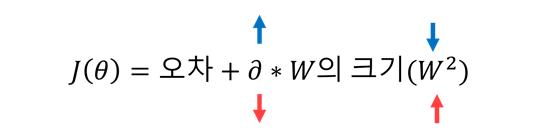

#### 1-1. 가상의 데이터 생성

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [ ]:
# 1000개의 데이터, multi feature(30개)을 가진 랜덤한 데이터 셋을 만들어 보자.
X_multi, y_multi = make_regression(n_samples = 1000, n_features = 30, bias = 10, noise = 50, random_state = 5)

# 생성한 가상의 데이터를 학습용 데이터(train data)와 검증용 데이터(test data)로 나누어 보자.
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.3, shuffle = True)

#### 1-2. 릿지 모델 생성 및 학습

`sklearn.linear_model.ridge_regression(X, y, alpha)`
* Scikit-Learn의 linear_model 패키지에서 릿지 회귀(ridge_regression) 모델을 import할 수 있다.

주요 parameter:
* `X`: 학습용 데이터
* `y`: 검증용 데이터
* `alpha`: weight의 크기를 제어하는 튜닝 파라미터 --> 규제, (기본값 = 1.0)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# Ridge모델은 linear_model에서 Ridge로 불러올 수 있다.
from sklearn.linear_model import Ridge

In [ ]:
# Ridge 모델을 생성하여 학습용 데이터를 학습시킨 뒤 model_Ridge 변수에 담아보자.
model_Ridge = Ridge().fit(X_train, y_train)

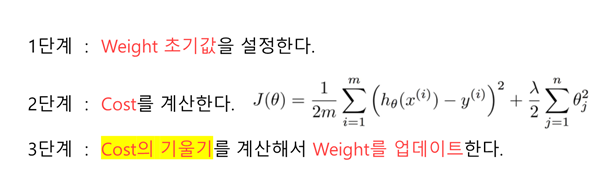

In [ ]:
# model_Ridge의 계수(=weight)를 출력해보자
print('weight : \n{}'.format(model_Ridge.coef_))

weight : 
[ 3.62912222e+00  8.90066471e-02 -7.18621526e-01  3.59365531e-01
  2.84805651e+01  7.76223261e-01 -7.75910855e-01 -1.10924786e+00
 -6.02548547e-01 -2.61561169e+00 -2.87602026e-01 -1.08765015e+00
  2.68995039e+01  2.06290965e+00 -2.38825466e-01  4.66006711e-01
  6.66828842e+01  9.09631730e+01  1.00362980e+02  9.10283917e+01
  7.47389464e-02  2.00728038e+00 -2.17290429e+00 -3.65410989e-01
  1.67512630e+00 -3.67460725e-01  1.24178961e+00  3.11845773e+01
  1.68897891e+01  2.44147627e+00]


In [ ]:
#규제가 적용되지 않은 일반 선형모델의 weight값과 비교해보자.
from sklearn.linear_model import LinearRegression
model_Linear = LinearRegression().fit(X_train, y_train)
print('weight : \n{}'.format(model_Linear.coef_))

# weight를 살펴보면 일반 선형모델 보다 릿지 모델의 weight 값의 크기가 큰 것을 알 수 있다. 
# 릿지 모델에 적용된 L2 규제방식 --> weight를 작게 만들어 예측에 끼치는 특정 피쳐의 영향도를 감소시킨다.

weight : 
[ 3.66462192e+00  9.29092347e-02 -7.32477831e-01  3.59809975e-01
  2.85099529e+01  7.86442743e-01 -7.79494839e-01 -1.10179042e+00
 -5.82817243e-01 -2.61903797e+00 -2.92258347e-01 -1.09909617e+00
  2.69385653e+01  2.07490326e+00 -2.44188912e-01  4.55099642e-01
  6.67813635e+01  9.10886719e+01  1.00518827e+02  9.11823211e+01
  6.04910140e-02  2.02188145e+00 -2.20413797e+00 -3.77606814e-01
  1.67696208e+00 -3.49037933e-01  1.23861155e+00  3.12308805e+01
  1.68974438e+01  2.45411252e+00]


####  1-3. alpha 조정

* alpha 값을 1에서 500으로 증가시키자 릿지모델의 예측성능이 오히려 나빠진 것을 확인할 수 있다.

In [ ]:
# alpha = 1
# 이전에 alpha 기본 값 1으로 학습이 되었던 릿지모델의 score을 출력해보자.
print('학습 데이터 점수 : {:.2f}'.format(model_Ridge.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'. format(model_Ridge.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.94


In [ ]:
# alpha = 500
# alpha값을 500으로 올린 후의 릿지모델의 score을 출력해보자.
model_ridge500 = Ridge(alpha = 500).fit(X_train, y_train)
print('학습 데이터 점수 : {:.2f}'.format(model_ridge500.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_ridge500.score(X_test, y_test)))

학습 데이터 점수 : 0.78
검증 데이터 점수 : 0.77


* alpha값을 높이면 weight를 크기를 감소시켜 학습데이터에 과소적합한 모델이 될 수 있기 때문에 모델의 예측성능이 나빠진 것이다 (학습 데이터 점수: 0.94 --> 0.79). 
* 하지만 학습 데이터의 패턴을 단순화하였기 때문에 과적합 모델이 되는 것을 피할 수 있다. (=일반화)

In [ ]:
# alpha = 1
# alpha = 1으로 학습이 되었던 릿지모델의 weight와 bias를 출력해보자.
print('weight : \n{}\n\n'.format(model_Ridge.coef_))
print('bias : \n{}'.format(model_Ridge.intercept_))

weight : 
[ 3.62912222e+00  8.90066471e-02 -7.18621526e-01  3.59365531e-01
  2.84805651e+01  7.76223261e-01 -7.75910855e-01 -1.10924786e+00
 -6.02548547e-01 -2.61561169e+00 -2.87602026e-01 -1.08765015e+00
  2.68995039e+01  2.06290965e+00 -2.38825466e-01  4.66006711e-01
  6.66828842e+01  9.09631730e+01  1.00362980e+02  9.10283917e+01
  7.47389464e-02  2.00728038e+00 -2.17290429e+00 -3.65410989e-01
  1.67512630e+00 -3.67460725e-01  1.24178961e+00  3.11845773e+01
  1.68897891e+01  2.44147627e+00]


bias : 
9.78709663340728


In [ ]:
# alpha = 500
# alpha값을 500으로 올린 후의 릿지모델의 weight와 bias를 출력해보자.
print('weight : \n{}\n\n'.format(model_ridge500.coef_))
print('bias : \n{}'.format(model_ridge500.intercept_))

weight : 
[-2.65641763e+00 -7.13314427e-01  1.34517430e+00  4.51941995e-01
  1.88123967e+01 -8.99323928e-01 -1.51522657e-01 -2.03932473e+00
 -3.50991448e+00 -1.30209013e+00  7.43534178e-01  9.78703220e-01
  1.55326681e+01  1.09821555e-01  5.28201672e-01  1.91158725e+00
  3.87650296e+01  5.41897437e+01  5.74031142e+01  4.98340085e+01
  2.36240581e+00 -7.77329695e-01  3.21680970e+00  1.52043391e+00
  1.05881839e+00 -3.07573574e+00  1.77953470e+00  1.81725057e+01
  1.26787429e+01 -4.48891144e-02]


bias : 
12.881836315321209


* 반대로 alpha값을 낮추게 되면 weight 크기에 대한 패널티가 작아지므로 예측성능(score)과 weight 값이 일반 선형회귀와 비슷해진다.

In [ ]:
# alpha = 0.005
# alpha값을 0.005로 감소 시킨 후의 릿지모델의 score을 출력해보자.
model_ridge005 = Ridge(alpha = 0.005).fit(X_train, y_train)
print('학습 데이터 점수 : {:.2f}'.format(model_ridge005.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_ridge005.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.94


In [ ]:
# 규제가 적용되지 않은 일반 선형회귀 모델의 score을 출력해보자.
print('학습 데이터 점수 : {:.2f}'.format(model_Linear.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_Linear.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.94


In [ ]:
# alpha = 0.005
# alpha = 0.005으로 학습이 되었던 릿지모델의 weight와 bias를 출력해보자.
print('weight : \n{}\n\n'.format(model_ridge005.coef_))
print('bias : \n{}'.format(model_ridge005.intercept_))

weight : 
[ 3.66444390e+00  9.28896827e-02 -7.32408309e-01  3.59807726e-01
  2.85098058e+01  7.86391488e-01 -7.79476862e-01 -1.10182784e+00
 -5.82916229e-01 -2.61902084e+00 -2.92235025e-01 -1.09903878e+00
  2.69383697e+01  2.07484309e+00 -2.44162001e-01  4.55154374e-01
  6.67808704e+01  9.10880435e+01  1.00518047e+02  9.11815501e+01
  6.05624714e-02  2.02180825e+00 -2.20398134e+00 -3.77545633e-01
  1.67695289e+00 -3.49130356e-01  1.23862748e+00  3.12306486e+01
  1.68974056e+01  2.45404917e+00]


bias : 
9.776152097196904


In [ ]:
# 규제가 적용되지 않은 일반 선형회귀 모델의 weight와 bias를 출력해보자.
print('weight : \n{}\n\n'.format(model_Linear.coef_))
print('bias : \n{}'.format(model_Linear.intercept_))

weight : 
[ 3.66462192e+00  9.29092347e-02 -7.32477831e-01  3.59809975e-01
  2.85099529e+01  7.86442743e-01 -7.79494839e-01 -1.10179042e+00
 -5.82817243e-01 -2.61903797e+00 -2.92258347e-01 -1.09909617e+00
  2.69385653e+01  2.07490326e+00 -2.44188912e-01  4.55099642e-01
  6.67813635e+01  9.10886719e+01  1.00518827e+02  9.11823211e+01
  6.04910140e-02  2.02188145e+00 -2.20413797e+00 -3.77606814e-01
  1.67696208e+00 -3.49037933e-01  1.23861155e+00  3.12308805e+01
  1.68974438e+01  2.45411252e+00]


bias : 
9.776097012571043


### Lasso Regression

Lasso Regression:

* 선형회귀에 L1 규제를 적용한 모델이다.

L1 비용함수

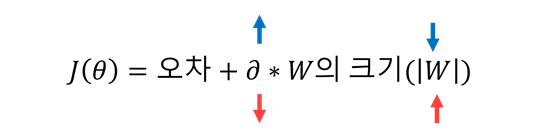

#####  1-4. 라소 모델 생성 및 학습

`sklearn.linear_model.ridge_regression(X, y, alpha, max_iter)`

* Scikit-Learn의 linear_model 패키지에서 릿지 회귀(ridge_regression) 모델을 import할 수 있다.

주요 parameter:

* `X`: 학습용 데이터
* `y`: 검증용 데이터
* `alpha`: weight의 크기를 제어하는 튜닝 파라미터 --> 규제, (기본값 = 1.0)
* `max_iterint`: 최대 iteration 횟수 (기본 값=1000)

참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
from sklearn.linear_model import Lasso
# 라쏘모델은 linear_model에서 Lasso로 불러올 수 있다.

In [ ]:
# 라쏘모델을 생성한 뒤, 이전 단계에서 생성하였던 가상의 학습 데이터 셋을 학습시켜보자. 
model_lasso = Lasso().fit(X_train, y_train)

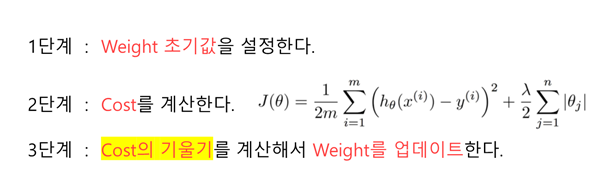

* Lasso의 weight를 살펴보면 Ridge와는 다르게 0으로 가까워지다 못해 0이 되어버린 값들을 살펴볼 수 있다.

In [ ]:
# Lasso모델의 weight와 bias를 각각 출력해보자. 
print('weight : \n{}\n\n'.format(model_lasso.coef_))
print('bias : \n{}'.format(model_lasso.intercept_))

weight : 
[ 2.38675684e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.73756315e+01  0.00000000e+00 -0.00000000e+00 -2.74048037e-01
 -0.00000000e+00 -1.63194279e+00 -0.00000000e+00 -4.23286434e-02
  2.60891571e+01  9.33088738e-01 -0.00000000e+00  0.00000000e+00
  6.59096605e+01  9.02776073e+01  9.91160398e+01  8.98430216e+01
  0.00000000e+00  9.89213455e-01 -9.33352731e-01  0.00000000e+00
  7.70153655e-01 -0.00000000e+00  2.74653192e-01  3.01267368e+01
  1.59518111e+01  1.46921556e+00]


bias : 
9.855281069639691


#### 1-5. alpha 조정

* alpha값이 증가할 수록 0의 값을 가진 feature weight의 개수도 증가한다. --> 불필요한 회귀 계수를 더욱 강력하게 규제하여 제거한다.

In [ ]:
# alpha = 0.005
# alpha값을 0.005로 감소 시킨 후의 라쏘모델의 weight와 bias을 출력해보자.
model_lasso005 = Lasso(alpha=0.005).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_lasso005.coef_))
print('bias : \n{}'.format(model_lasso005.intercept_))

weight : 
[ 3.65783091e+00  8.73766510e-02 -7.26096807e-01  3.54672644e-01
  2.85038792e+01  7.81885867e-01 -7.75415422e-01 -1.09762980e+00
 -5.79842660e-01 -2.61442049e+00 -2.87761136e-01 -1.09411868e+00
  2.69347659e+01  2.06925134e+00 -2.37405460e-01  4.50699832e-01
  6.67771826e+01  9.10840800e+01  1.00512465e+02  9.11751738e+01
  5.48714832e-02  2.01673954e+00 -2.19753673e+00 -3.70136800e-01
  1.67157050e+00 -3.45945977e-01  1.23449397e+00  3.12248244e+01
  1.68929249e+01  2.44909908e+00]


bias : 
9.776621198054219


In [ ]:
# alpha = 1
# alpha=1인 라쏘모델의 weight와 bias을 출력해보자.
print('weight : \n{}\n\n'.format(model_lasso.coef_))
print('bias : \n{}'.format(model_lasso.intercept_))

weight : 
[ 2.38675684e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.73756315e+01  0.00000000e+00 -0.00000000e+00 -2.74048037e-01
 -0.00000000e+00 -1.63194279e+00 -0.00000000e+00 -4.23286434e-02
  2.60891571e+01  9.33088738e-01 -0.00000000e+00  0.00000000e+00
  6.59096605e+01  9.02776073e+01  9.91160398e+01  8.98430216e+01
  0.00000000e+00  9.89213455e-01 -9.33352731e-01  0.00000000e+00
  7.70153655e-01 -0.00000000e+00  2.74653192e-01  3.01267368e+01
  1.59518111e+01  1.46921556e+00]


bias : 
9.855281069639691


In [ ]:
# alpha = 100
# alpha값을 100으로 증가 시킨 후의 라쏘모델의 weight와 bias을 출력해보자.
model_lasso100 = Lasso(alpha=100).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_lasso100.coef_))
print('bias : \n{}'.format(model_lasso100.intercept_))

weight : 
[-0. -0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0.  0.
  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.]


bias : 
17.168534530460384


* 라쏘모델에서는 불필요한 회귀계수를 0으로 만들기 때문에 적절한 피처만 회귀에 포함시키는 '피처 선택'의 기능이 있다고 할 수 있다. 

In [ ]:
# alpha값이 변함에 따라 30개의 특성(feature)중 몇개의 특성을 회귀 분석에 사용했는지 확인해보자.
import numpy as np
print('alpha=0.005\n 사용된 특성 수 : {}개\n'.format(np.sum(model_lasso005.coef_ != 0)))
print('alpha=1\n 사용된 특성 수 : {}개\n'.format(np.sum(model_lasso.coef_ != 0)))
print('alpha=100\n 사용된 특성 수 : {}개'.format(np.sum(model_lasso100.coef_ != 0)))

alpha=0.005
 사용된 특성 수 : 30개

alpha=1
 사용된 특성 수 : 18개

alpha=100
 사용된 특성 수 : 0개


* 과도하게 alpha 값을 증가시키면 오히려 적절한 피처가 제거되고 과소적합이 일어나 예측성능이 감소한다. 

In [ ]:
# alpha = 1
print('학습 데이터 점수 : {:.2f}'.format(model_lasso.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_lasso.score(X_test, y_test)))

학습 데이터 점수 : 0.94
검증 데이터 점수 : 0.94


In [ ]:
# alpha = 100
print('학습 데이터 점수 : {:.2f}'.format(model_lasso100.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_lasso100.score(X_test, y_test)))

학습 데이터 점수 : 0.00
검증 데이터 점수 : -0.01


### Elastic Net

- Elastic Net은 Ridge와 Lasso를 절충한 회귀 모델이다.

Elastic Net 비용함수

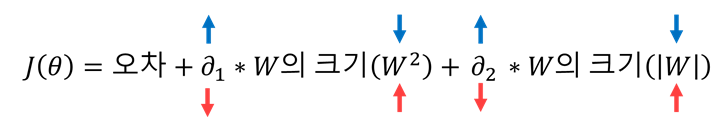

#### 1-7. 엘라스틱넷 모델 생성 및 학습

`ElasticNet(alpha, l1_ratio)`

중요 parameter
* `alpha`: l1 규제(lasso) + l2 규제(ridge), (기본 값 = 1.0)
* `l1_ration`: l1 규제(lasso)의 비율 (기본 값 = 0.5) --> l1_ratio = 0이면 L2 규제가 됨, l1_ratio = 1이면 L1 규제가 됨. 0 < l1_ratio < 1이면 L1와 L2를 합친 규제가 됨.

참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet


In [ ]:
# Elastic Net모델은 linear_model에서 ElasticNet으로 불러올 수 있다.

from sklearn.linear_model import ElasticNet

In [ ]:
# Elastic Net모델에 앞서 생성한 가상의 데이터를 학습시켜보자.
model_ela = ElasticNet().fit(X_train, y_train)

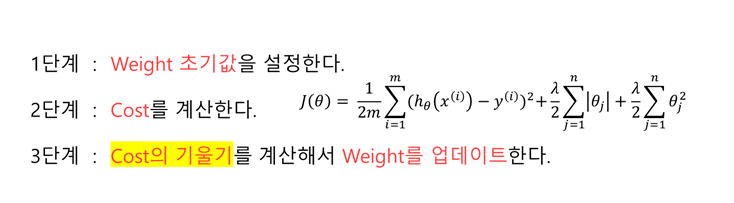

In [ ]:
# 학습된 모델의 weight와 bias를 출력해보자.
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : \n{}'.format(model_ela.intercept_))

weight : 
[-1.66847016 -0.27171305  0.84509283  0.10047796 20.65735115 -0.32907051
 -0.         -1.72599824 -3.03692782 -1.21034025  0.29463686  0.40559277
 17.47889932  0.          0.11205394  1.49089818 44.03992474 61.42185883
 65.44875148 57.31423671  1.89261221 -0.18150977  2.3711471   1.06116967
  0.91299169 -2.58356694  1.42155287 20.4430907  13.5387042   0.        ]


bias : 
12.200661576585247


In [ ]:
#30개의 특성(feature)중 몇개의 특성을 엘라스틱넷 회귀 분석에 사용했는지 확인해보자.
import numpy as np
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

사용된 특성 수 : 27개


In [ ]:
print('학습 데이터 점수 : {:.2f}'.format(model_ela.score(X_train, y_train)))
print('검증 데이터 점수 : {:.2f}'.format(model_ela.score(X_test, y_test)))

학습 데이터 점수 : 0.83
검증 데이터 점수 : 0.83


#### 1-8. alpha 조정  


In [ ]:
# alpha = 0.1
model_ela = ElasticNet(alpha = 0.1).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[ 2.48099352e+00 -0.00000000e+00 -2.45379780e-01  2.99516723e-01
  2.74649730e+01  4.23616983e-01 -6.25637276e-01 -1.29380744e+00
 -1.17188590e+00 -2.45161430e+00 -9.33768722e-02 -6.80444363e-01
  2.55961460e+01  1.64756158e+00 -2.23969276e-02  7.57697872e-01
  6.34691635e+01  8.68617012e+01  9.52936278e+01  8.60315901e+01
  4.59196453e-01  1.50580619e+00 -1.15382027e+00  0.00000000e+00
  1.57478071e+00 -8.98317512e-01  1.29743045e+00  2.96411099e+01
  1.65702988e+01  1.99481817e+00]


bias : 10.142716971669614


사용된 특성 수 : 28개


In [ ]:
# alpha = 1
model_ela = ElasticNet(alpha = 1).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[-1.66847016 -0.27171305  0.84509283  0.10047796 20.65735115 -0.32907051
 -0.         -1.72599824 -3.03692782 -1.21034025  0.29463686  0.40559277
 17.47889932  0.          0.11205394  1.49089818 44.03992474 61.42185883
 65.44875148 57.31423671  1.89261221 -0.18150977  2.3711471   1.06116967
  0.91299169 -2.58356694  1.42155287 20.4430907  13.5387042   0.        ]


bias : 12.200661576585247


사용된 특성 수 : 27개


In [ ]:
# alpha = 10
model_ela = ElasticNet(alpha = 10).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[-1.22989649e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.37955412e+00 -0.00000000e+00 -0.00000000e+00 -7.42286097e-02
 -9.66297987e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.50991316e+00 -0.00000000e+00  0.00000000e+00  4.57479218e-03
  1.04307952e+01  1.51905320e+01  1.56932228e+01  1.28045021e+01
  4.89279827e-01 -0.00000000e+00  1.32502427e+00  2.32159002e-02
  0.00000000e+00 -7.21055977e-01  1.13019414e-01  4.50383336e+00
  3.68625178e+00 -0.00000000e+00]


bias : 15.919016067527215


사용된 특성 수 : 17개


#### 1-9. l1_ration 조정

In [ ]:
# l1_ratio = 0.1
model_ela = ElasticNet(alpha = 10, l1_ratio = 0.1).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[-1.2505967  -0.2167586   0.35894053  0.13160785  3.68639643 -0.24380532
 -0.         -0.47722826 -1.043749   -0.          0.27861024  0.39756715
  2.49719595 -0.          0.05184424  0.43802446  6.66998556  9.53765168
  9.81704892  8.01320467  0.73943393 -0.43777915  1.30274433  0.4451777
  0.10092266 -0.89006287  0.50723804  3.11024277  2.68187209 -0.22420558]


bias : 16.410911242848382


사용된 특성 수 : 27개


In [ ]:
# l1_ratio = 0.5
model_ela = ElasticNet(alpha = 10, l1_ratio = 0.5).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[-1.22989649e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.37955412e+00 -0.00000000e+00 -0.00000000e+00 -7.42286097e-02
 -9.66297987e-01 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.50991316e+00 -0.00000000e+00  0.00000000e+00  4.57479218e-03
  1.04307952e+01  1.51905320e+01  1.56932228e+01  1.28045021e+01
  4.89279827e-01 -0.00000000e+00  1.32502427e+00  2.32159002e-02
  0.00000000e+00 -7.21055977e-01  1.13019414e-01  4.50383336e+00
  3.68625178e+00 -0.00000000e+00]


bias : 15.919016067527215


사용된 특성 수 : 17개


In [ ]:
# l1_ratio = 0.9
model_ela = ElasticNet(alpha = 10, l1_ratio = 0.9).fit(X_train, y_train)
print('weight : \n{}\n\n'.format(model_ela.coef_))
print('bias : {}\n\n'.format(model_ela.intercept_))
print('사용된 특성 수 : {}개'.format(np.sum(model_ela.coef_ != 0)))

weight : 
[-0.         -0.          0.          0.         12.5903799  -0.
 -0.         -0.         -0.         -0.          0.          0.
  8.66595357  0.          0.          0.         29.16493956 42.72971126
 45.20489946 38.04060429  0.         -0.          0.          0.
  0.         -0.          0.         11.392298    7.37304698 -0.        ]


bias : 13.817426253559784


사용된 특성 수 : 8개


## 2) 보스턴 주택데이터로 예측하기

###### 2-1. 보스턴 주택 데이터 생성

보스턴 주택 데이터는 사이킷런에 내장된 데이터 셋이다.

feature:

* `CRIM`: 지역별 범죄 발생률
* `ZN`: 25,000 평방피트를 초과하는 거주 지역의 비율
* `INDUS`: 비상업 지역 넓이 비율
* `CHAS`: 찰스강에 대한 더미 변수 (강의 경계에 위치할 시 1, 아닐 시 2)
* `NOX`: 일산화질소 농도
* `RM`: 거주할 수 있는 방 개수
* `AGE`: 1940년 이전에 건축된 소유 주택의 비율
* `DIS`: 5개 주요 고용센터까지의 가중 거리
* `RAD`: 고속도로 접근 용이도
* `TAX`: 10,000달러당 재산세율
* `PTRATIO`: 지역의 교사와 학생 수 비율
* `B`: 지역의 흑인 거주 비율
* `LSTAT`: 하위 계층의 비율
* `MEDV`: 본인 소유의 주택 가격(중앙값)

<a title="Andrew Jameson at English Wikipedia, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg"><img width="512" alt="Street scape in Boston-Edison" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Street_scape_in_Boston-Edison.jpg/512px-Street_scape_in_Boston-Edison.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Street_scape_in_Boston-Edison.jpg">Andrew Jameson at English Wikipedia</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
# load_boston() 명령어로 boston data set을 로드해 boston 변수에 담아보자.
boston_data = load_boston()

In [ ]:
# features를 X_data 변수, 그리고 target을 y_data 변수에 담아보자.
X_data, y_data = boston_data['data'], boston_data['target']

In [ ]:
# X data와 y data의 크기를 각각 출력해보자.
print('data의 크기:', boston_data['data'].shape)
print('target의 크기:', boston_data['target'].shape)

data의 크기: (506, 13)
target의 크기: (506,)


###### 2-2. 회귀 모델 학습 및 비교

* Boston 데이터를 학습한 4가지 종류의 회귀 모델을 비교해보자.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
# 일반 선형회귀 모델, 규제 적용 모델(rige, lasso, model_elastic)을 생성하고 학습 데이터로 학습시켜보자. 
model_linear = LinearRegression().fit(X_data, y_data)
model_ridge = Ridge(alpha=100).fit(X_data, y_data)
model_lasso = Lasso(alpha=100).fit(X_data, y_data)
model_elastic = ElasticNet(alpha=100, l1_ratio=0.5).fit(X_data, y_data)

In [ ]:
# 각 모델의 학습결과를 비교해보자.
models = [model_linear, model_ridge, model_lasso, model_elastic]
model_name = ['Linear model', 'Ridge model', 'Lasso model', 'Elastic model']

for i in range(len(models)):
    print(model_name[i])
    print('weight:\n {1}\n'.format(model_name[i], models[i].coef_))
    print('bias:\n {1}\n\n'.format(model_name[i], models[i].intercept_))


Linear model
weight:
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]

bias:
 36.459488385090125


Ridge model
weight:
 [-1.02201585e-01  5.44964806e-02 -5.28263046e-02  6.38334836e-01
 -2.62847034e-01  2.33453579e+00  1.21168955e-03 -1.15338989e+00
  3.15357579e-01 -1.58557572e-02 -8.29217879e-01  9.39260996e-03
 -6.60763828e-01]

bias:
 36.37084182084554


Lasso model
weight:
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.02097192 -0.          0.00446643
 -0.        ]

bias:
 29.501261690147523


Elastic model
weight:
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.02134719 -0.          0.01011044
 -0.        ]

bias:
 27.641390616526348




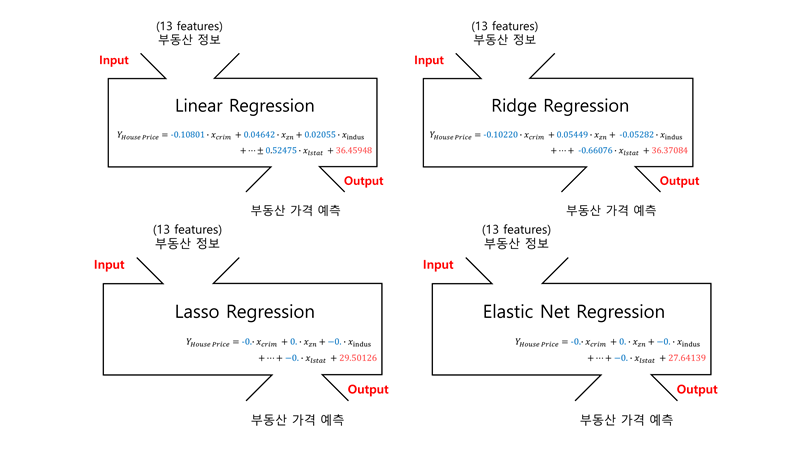

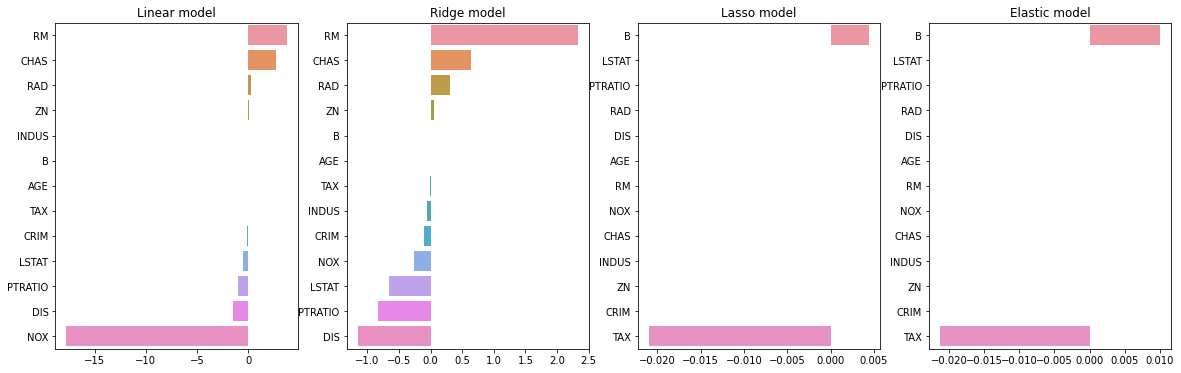

In [ ]:
# 각 모델의 feature별 weight를 시각화 해보자.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

model_name = ['Linear model', 'Ridge model', 'Lasso model', 'Elastic model']

fix, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=4)

# col = column 위치, model의 인덱스
for col, model in enumerate(models):
    weight = pd.Series(data=model.coef_, index=boston_data['feature_names'])
    # weight 크기가 큰 feature 순서로 나열
    weight = weight.sort_values(ascending=False)
    axs[col].set_title(model_name[col])
    sns.barplot(x=weight.values, y=weight.index, ax=axs[col])

plt.show()